WARNING:

"fitting_parameters.h5" need to be in the directory you are working on
or there will be an error for importing mr_forecast in the next cell.

If you don't want the file in this directory,
change the mr_forecast.py line 16

hyper_file = 'fitting_parameters.h5' 

->

hyper_file = [directory of fitting parameter file]+'fitting_parameters.h5'

In [31]:
import numpy as np
import mr_forecast as mr
import matplotlib.pyplot as plt
import h5py
from astropy.io import ascii
%matplotlib inline

================================

predict the mean and std of radius given those of the mass

In [5]:
Rmedian, Rplus, Rminus = mr.Mstat2R(mean=1.0, std=0.1, unit='Earth', sample_size=100, classify='Yes')

Terran 95.0%, Neptunian 5.0%, Jovian 0.0%, Star 0.0%


In [6]:
print('R = {0:.2f} (+ {1:.2f} - {2:.2f}) REarth'.format(Rmedian, Rplus, Rminus))

R = 1.00 (+ 0.13 - 0.10) REarth


================================

predict a vector of radius given a vector of mass

In [7]:
M1 = np.loadtxt('demo_mass.dat')
R1 = mr.Mpost2R(M1, unit='Earth', classify='Yes')

Terran 100.0%, Neptunian 0.0%, Jovian 0.0%, Star 0.0%


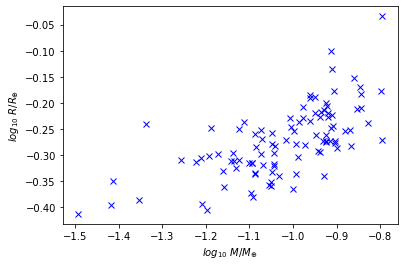

In [8]:
plt.plot(np.log10(M1), np.log10(R1), 'bx')
plt.xlabel(r'$log_{10}\ M/M_{\oplus}$')
plt.ylabel(r'$log_{10}\ R/R_{\oplus}$')
plt.show()

================================

predict the mean and std of mass given those of the radius

In [9]:
Mmedian, Mplus, Mminus = mr.Rstat2M(mean=0.1, std=0.01, unit='Jupiter', sample_size=100, grid_size=1e3, classify='Yes')

Terran 71.0%, Neptunian 29.0%, Jovian 0.0%, Star 0.0%


In [10]:
print('M = {0:.3f} (+ {1:.3f} - {2:.3f}) MEarth'.format(Mmedian, Mplus, Mminus))

M = 0.004 (+ 0.005 - 0.001) MEarth


================================

predict a vector of mass given a vector of radius

In [11]:
R2 = np.loadtxt('demo_radius.dat')
M2 = mr.Rpost2M(R2, unit='Earth', grid_size=1e3, classify='Yes')

Terran 67.0%, Neptunian 33.0%, Jovian 0.0%, Star 0.0%


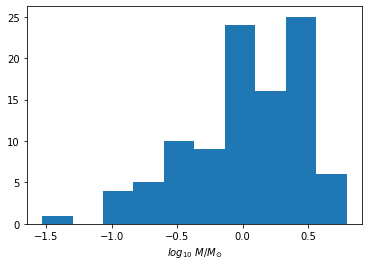

In [12]:
plt.hist(np.log10(M2))
plt.xlabel(r'$log_{10}\ M/M_{\odot}$')
plt.show()

# model parameters

In [28]:
## read parameter file
hyper_file = 'fitting_parameters.h5'
h5 = h5py.File(hyper_file, 'r')

In [29]:
print(type(h5))
print(h5)
k = list(h5.keys())
print(k)
print(type(h5['hyper_posterior']))
hp = h5['hyper_posterior']
print(hp)
print(list(hp.attrs))
all_hyper = hp[:]
print(np.shape(all_hyper))
print(type(all_hyper))
print(all_hyper)

<class 'h5py._hl.files.File'>
<HDF5 file "fitting_parameters.h5" (mode r)>
['hyper_posterior']
<class 'h5py._hl.dataset.Dataset'>
<HDF5 dataset "hyper_posterior": shape (1020431, 12), type "<f8">
[]
(1020431, 12)
<class 'numpy.ndarray'>
[[-0.0125921   0.27410939  0.60248143 ...  0.33621657  2.1189979
   4.43530749]
 [-0.01178978  0.27464144  0.59903108 ...  0.34018224  2.12387865
   4.43706841]
 [-0.01170508  0.273465    0.59992477 ...  0.34247496  2.12954311
   4.44269832]
 ...
 [ 0.01101382  0.28605739  0.65167291 ...  0.48875647  2.02281465
   4.46975324]
 [ 0.01030998  0.28116919  0.64048695 ...  0.46772075  2.02423298
   4.46942985]
 [ 0.01188984  0.27989382  0.63562988 ...  0.46331946  2.01739445
   4.46989571]]


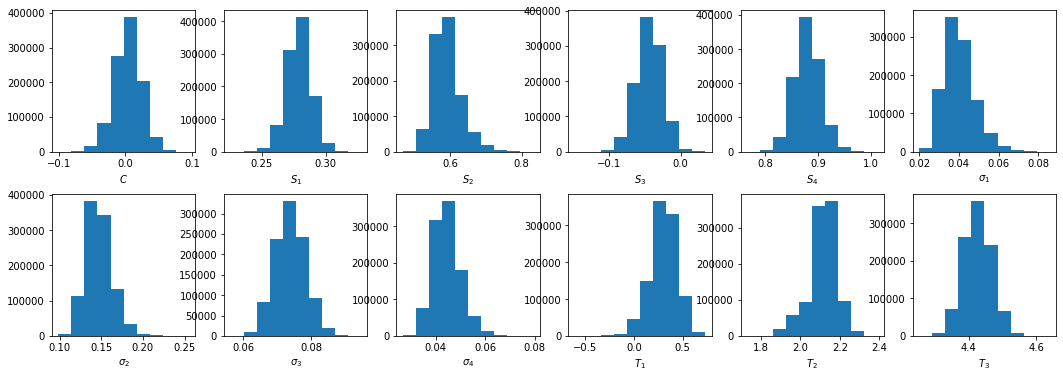

In [30]:
# The rows of all_hyper are the posterior samples plotted in Jingjing's figure 2, with summary statistics in table 1.

fig, axes = plt.subplots(2,6,figsize=(18,6))
labels=[r'$C$',                                                    # 10**C has units of R_earth
        r'$S_1$',r'$S_2$',r'$S_3$',r'$S_4$',                       # unitless; already OK
        r'$\sigma_1$',r'$\sigma_2$',r'$\sigma_3$',r'$\sigma_4$',   # fractional; already OK
        r'$T_1$',r'$T_2$',r'$T_3$']                                # 10**T has units of M_earth
for i in range(12):
    axes[i//6,i%6].hist(all_hyper[:,i])
    axes[i//6,i%6].set_xlabel(labels[i])
plt.subplots_adjust(hspace=0.3)
plt.show()

# Data

In [47]:
dat = ascii.read("./forecasterData.tsv")
print(dat)
for col in ['Mass','e_Mass','Rad','e_Rad']:
    dat[col] = dat[col].astype(float)
    

         Name          Mass e_Mass ...   _RAdeg    _DEdeg 
--------------------- ----- ------ ... --------- ---------
NGC6791 KR V20        0.827  0.004 ... 290.23888  37.76017
HD 124784             0.854  0.003 ... 214.24131  -49.9451
Parenago 1478         0.727   0.01 ... 083.61604  -5.69383
HD 7700               0.764  0.004 ... 019.22966    6.8117
BD+34 4217            0.814  0.013 ... 314.55605   35.1749
TYC 3629-740-1        0.869  0.004 ... 341.23793  49.65764
GU Boo A               0.61  0.006 ... 230.47846  33.93578
GU Boo B                0.6  0.006 ... 230.47846  33.93578
YY Gem A              0.599  0.005 ... 113.65660  31.86974
YY Gem B              0.599  0.005 ... 113.65660  31.86974
                  ...   ...    ... ...       ...       ...
WASP-112 b             0.88   0.12 ... 339.48933 -35.15399
WASP-120 b             5.01   0.26 ... 062.61606 -45.89821
WASP-121 b            1.183  0.064 ... 107.60024 -39.09737
WASP-122 b            1.372  0.072 ... 108.30145 -42.409

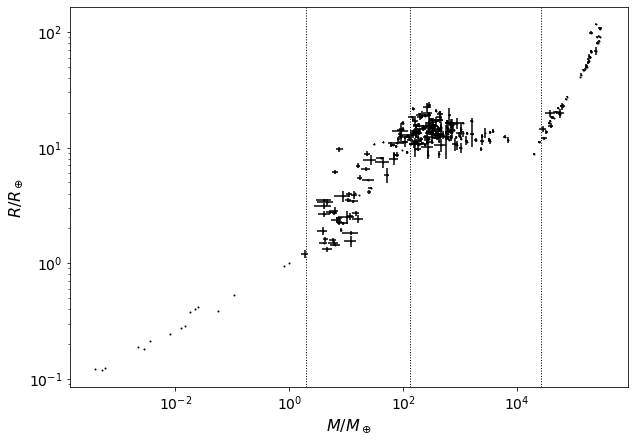

In [65]:
# get all masses in earth masses, radii in earth radii
m = np.zeros(316)
m_unc = np.zeros(316)
r = np.zeros(316)
r_unc = np.zeros(316)

for i in range(316):
    if dat['x_Mass'][i]=='Msun':
        m[i] = dat['Mass'][i]*333060.4
        m_unc[i] = dat['e_Mass'][i]*333060.4
    elif dat['x_Mass'][i]=='Mjup':
        m[i] = dat['Mass'][i]*317.828
        m_unc[i] = dat['e_Mass'][i]*317.828
    else:
        m[i] = dat['Mass'][i]
        m_unc[i] = dat['e_Mass'][i]
        
    if dat['x_Rad'][i]=='Rsun':
        r[i] = dat['Rad'][i]*109.2
        r_unc[i] = dat['e_Rad'][i]*109.2
    elif dat['x_Rad'][i]=='Rjup':
        r[i] = dat['Rad'][i]*11.21
        r_unc[i] = dat['e_Rad'][i]*11.21
    else:
        r[i] = dat['Rad'][i]
        r_unc[i] = dat['e_Rad'][i]

        
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.errorbar(m,r,xerr=m_unc,yerr=r_unc,marker='.',ms=2,color='k',ls='None',capsize=0)
ax.axvline(x=2.0,color='k',ls=':',lw=1)
ax.axvline(x=0.41*317.828,color='k',ls=':',lw=1)
ax.axvline(x=0.08*333060.4,color='k',ls=':',lw=1)
ax.loglog()
ax.set_xlabel(r'$M/M_\oplus$',fontsize=16)
ax.set_ylabel(r'$R/R_\oplus$',fontsize=16)
ax.tick_params(axis='both',labelsize=14)
plt.show()